In [1]:
import numpy as np
import matplotlib.pyplot as plt
from ROOT import *
import time as t

Welcome to JupyROOT 6.24/02


1.2657458035623923e-29 161.97694786512318
 FCN=161.977 FROM MIGRAD    STATUS=CONVERGED      35 CALLS          36 TOTAL
                     EDM=5.68583e-10    STRATEGY= 1      ERROR MATRIX ACCURATE 
  EXT PARAMETER                                   STEP         FIRST   
  NO.   NAME      VALUE            ERROR          SIZE      DERIVATIVE 
   1  p0           1.40913e+01   4.63491e-02   2.88920e-04   7.10862e-04
   2  p1           1.41420e+04   1.75086e+02   1.09090e+00   4.07150e-08


Warning in <TROOT::Append>: Replacing existing TH1: h (Potential memory leak).
Warning in <TCanvas::Constructor>: Deleting canvas with same name: c1


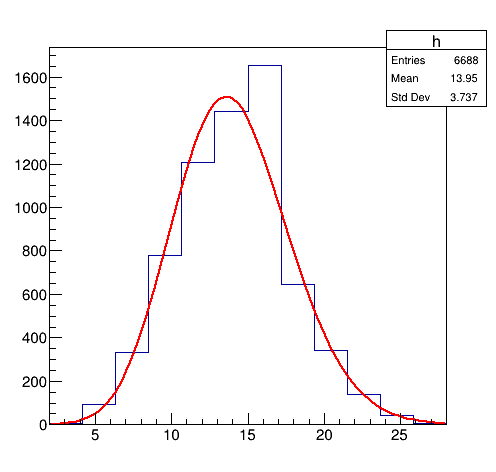

In [39]:
rnd=TRandom3()
rnd.SetSeed(123456789)

Nev=100000

mu=14
n=0
s=0

h=TH1D("h","",12,0,0)
for i in range (0,Nev):
    dt = -np.log(1-rnd.Rndm())
    s += dt
    if(s>mu):          
        h.Fill(i-n-1)
        n=i
        s=0

f=TF1("f","[1]*TMath::Poisson(x,[0])")
f.SetParameter(0,mu)
f.SetParameter(1,h.GetEntries()*h.GetBinWidth(1))
    
c1=TCanvas("c1","",500,500)
c1.Draw()
c1.cd()
h.SetMarkerStyle(20)
h.Fit('f')
h.Draw()

print(f.GetProb(),f.GetChisquare())